### EDA

In [1]:
import pandas as pd

In [2]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [3]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [4]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

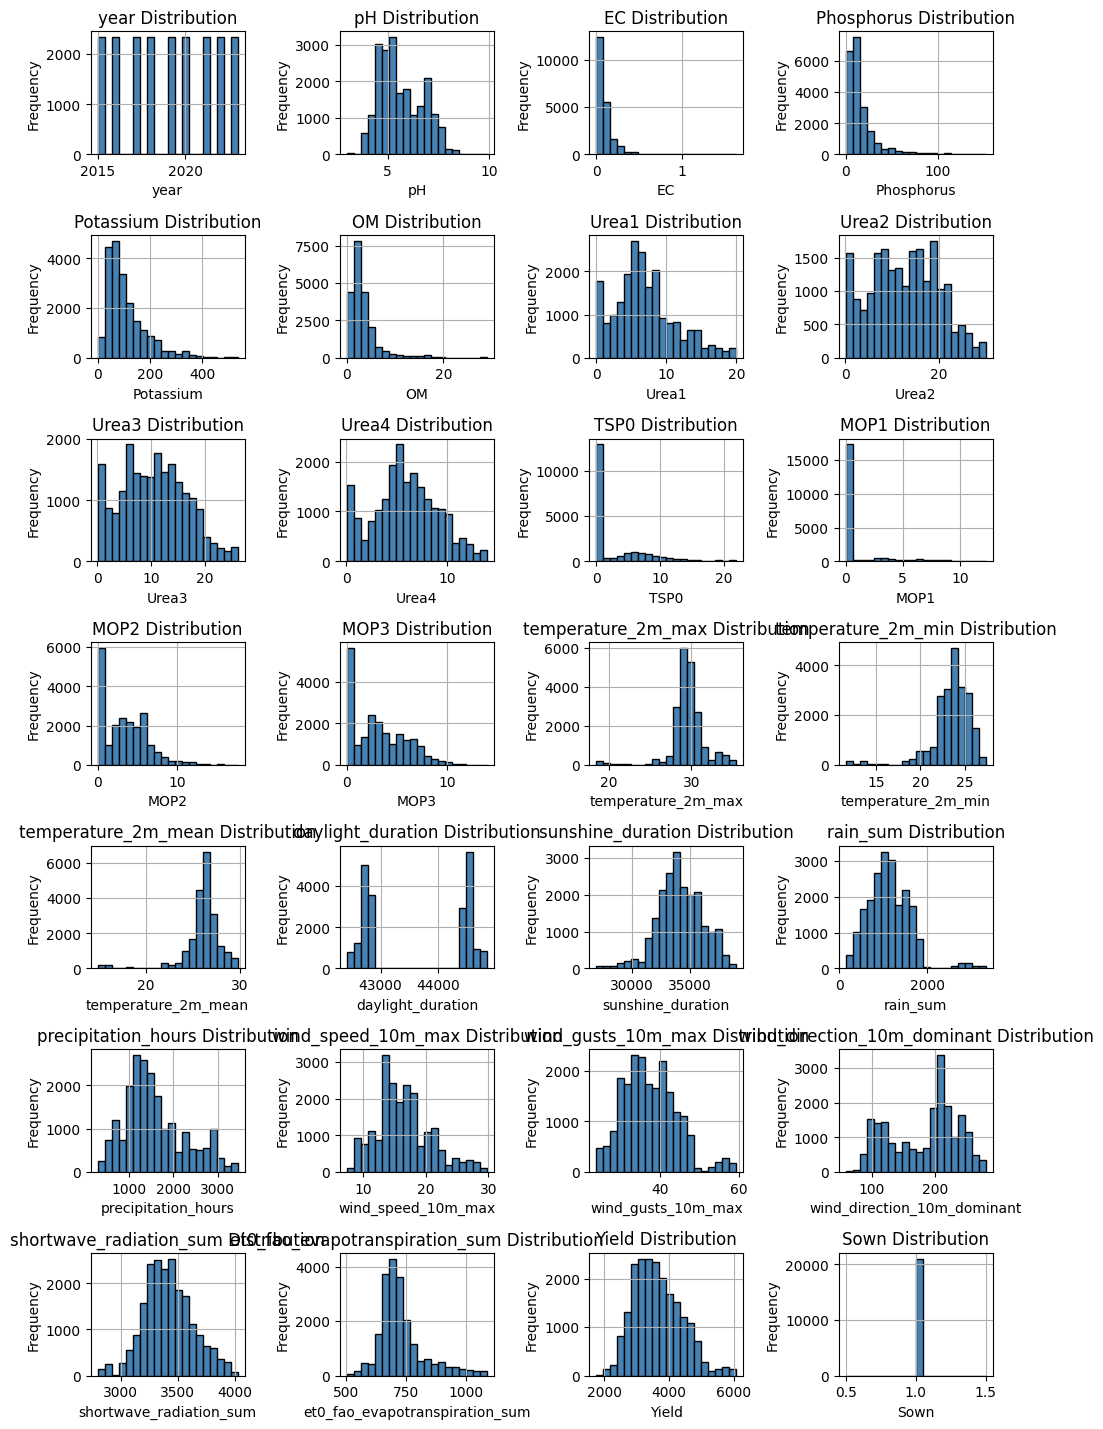

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

showdist()

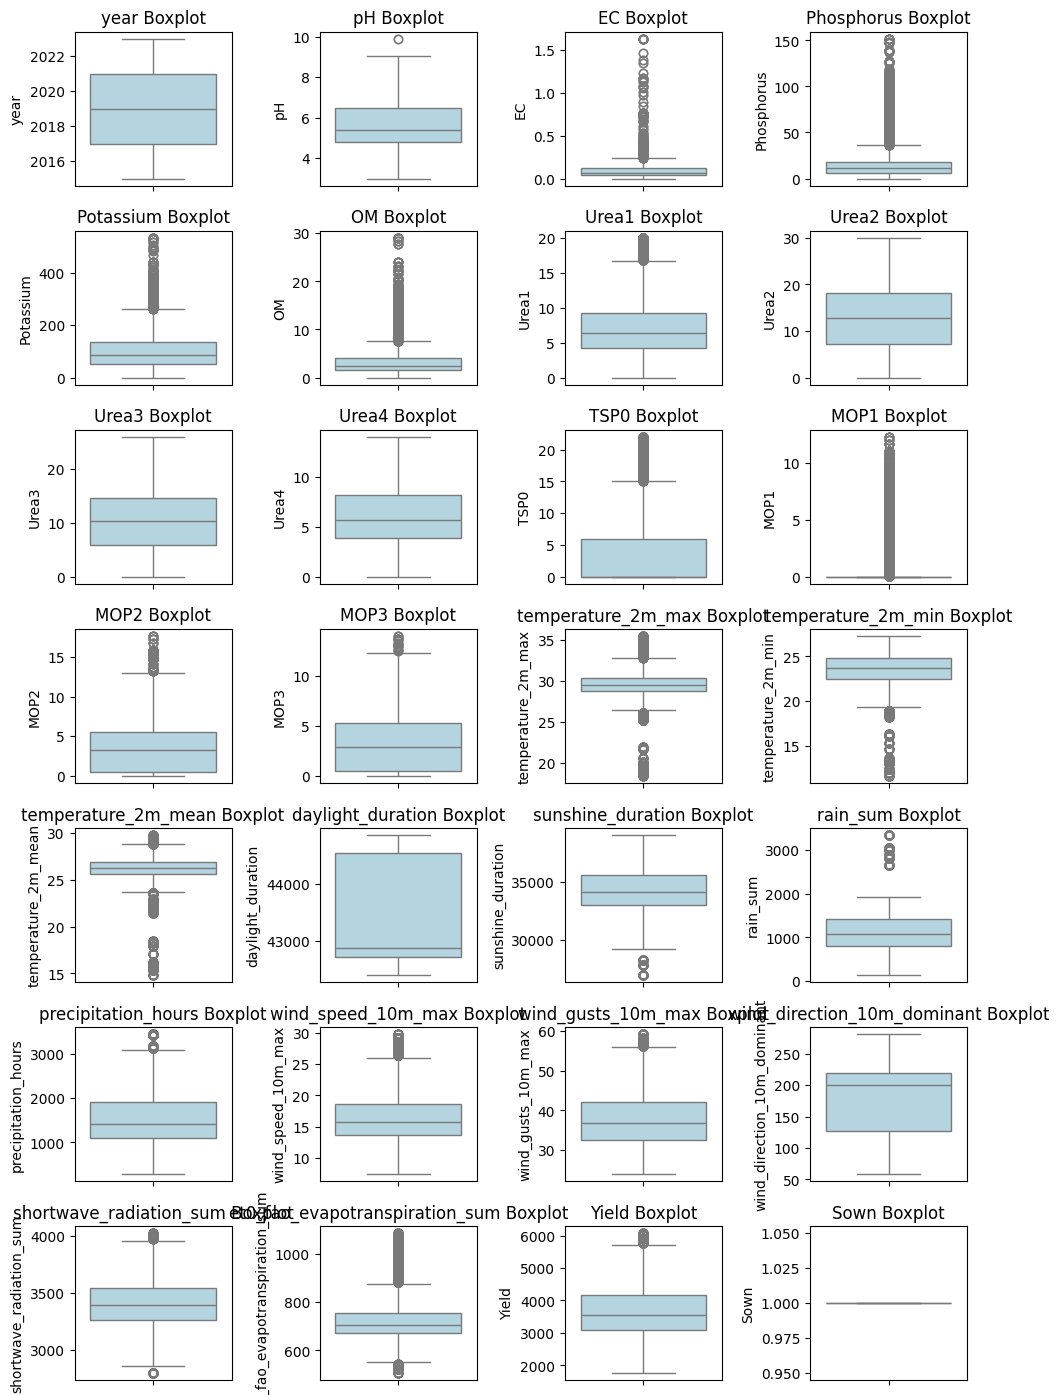

In [6]:
numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 16))
for i, col in enumerate(numerical_columns):
    plt.subplot(8, 4, i + 1)  # Adjust the number of rows and columns as necessary
    sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

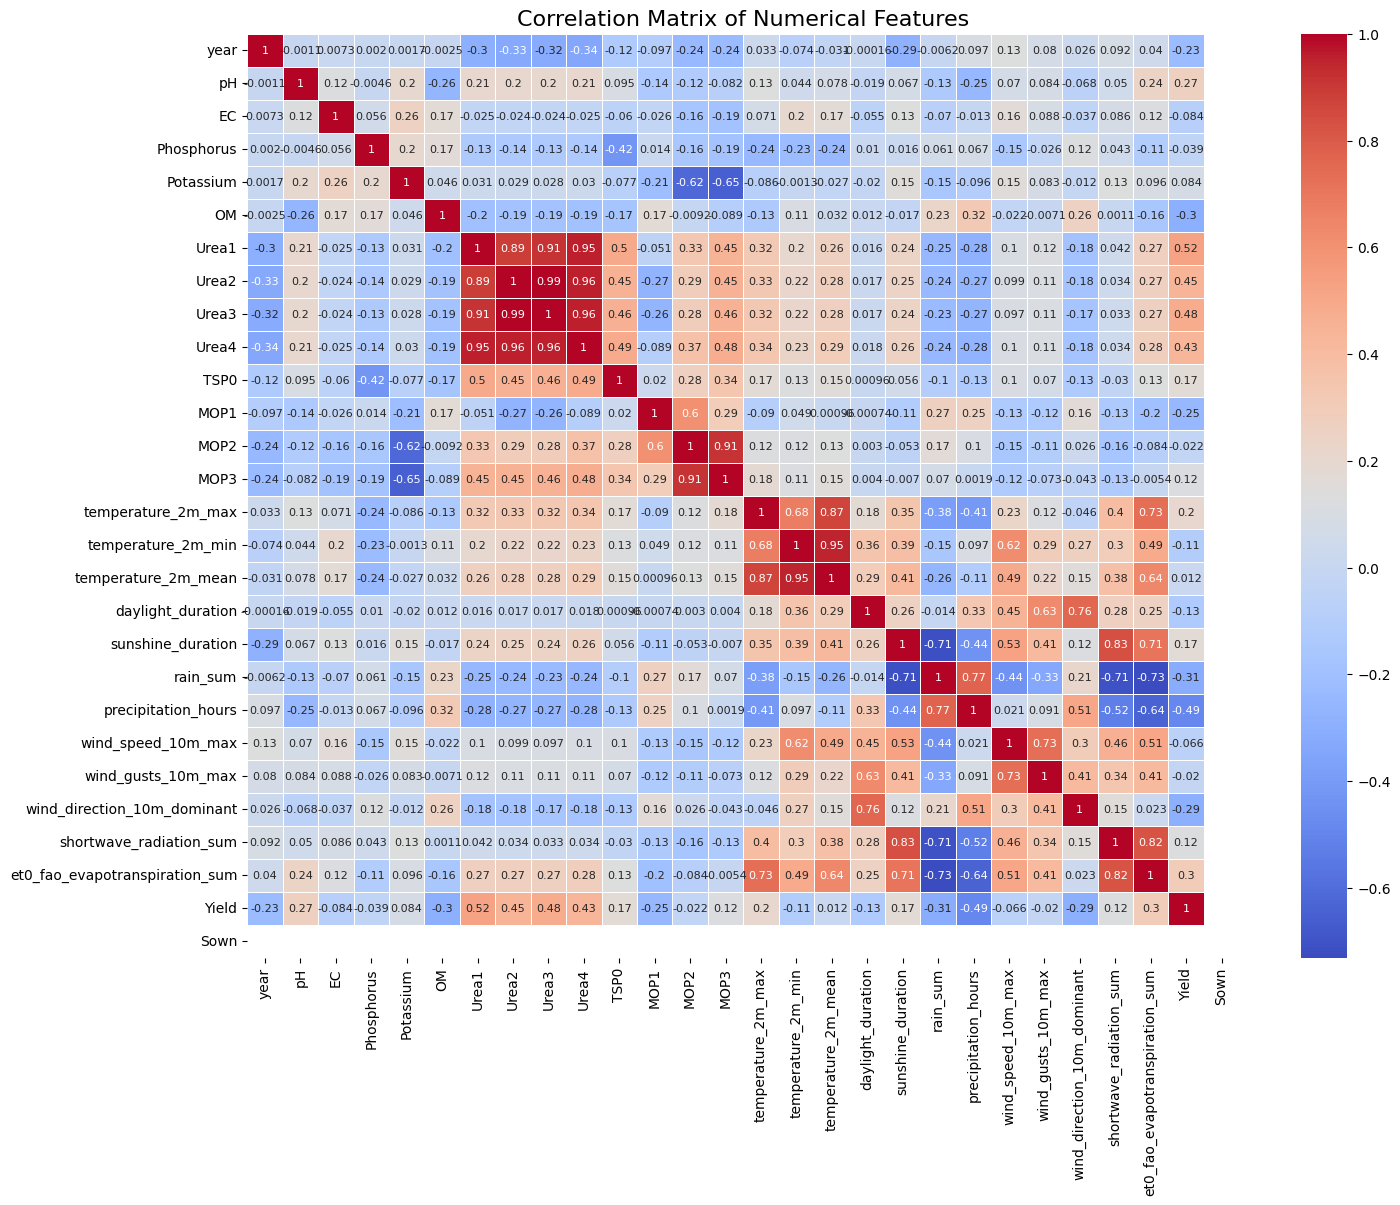

In [7]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Axes: title={'center': 'Average Yield Over Seasons'}, xlabel='year,season'>

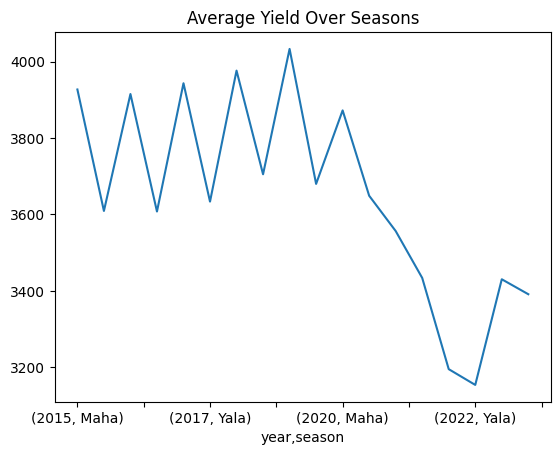

In [8]:
final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### Experimenting with multiple hidden layers and perceptrons

Training model with activation function: relu


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.3842 - mean_absolute_error: 1.1960 - val_loss: 0.6652 - val_mean_absolute_error: 0.6196 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9482 - mean_absolute_error: 0.7578 - val_loss: 0.3953 - val_mean_absolute_error: 0.4815 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7191 - mean_absolute_error: 0.6615 - val_loss: 0.2933 - val_mean_absolute_error: 0.4136 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5827 - mean_absolute_error: 0.5983 - val_loss: 0.2386 - val_mean_absolute_error: 0.3712 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5151 - mean_absolute_error: 0.5556 - val_loss: 0.2011 - val_mean_absolute_error: 0.3410 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4454 - mean_absolute_error: 0.5216 - val_l

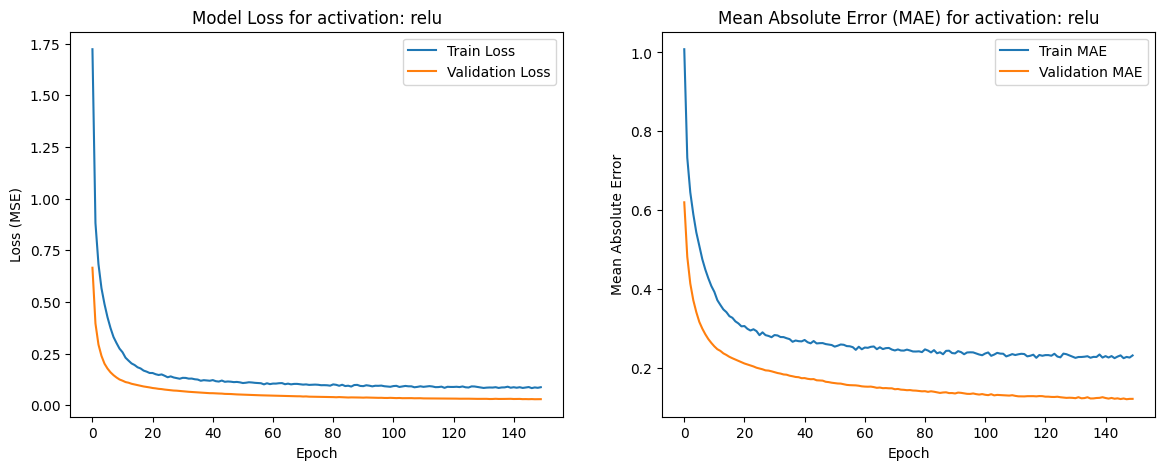

Training model with activation function: tanh
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.9994 - mean_absolute_error: 1.3563 - val_loss: 0.4943 - val_mean_absolute_error: 0.5485 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8716 - mean_absolute_error: 0.7378 - val_loss: 0.3249 - val_mean_absolute_error: 0.4351 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7155 - mean_absolute_error: 0.6648 - val_loss: 0.2701 - val_mean_absolute_error: 0.3962 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6376 - mean_absolute_error: 0.6274 - val_loss: 0.2367 - val_mean_absolute_error: 0.3713 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5838 - mean_absolute_error: 0.5993 - val_loss: 0.2143 - val_mean_absolute_error: 0.3494 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss

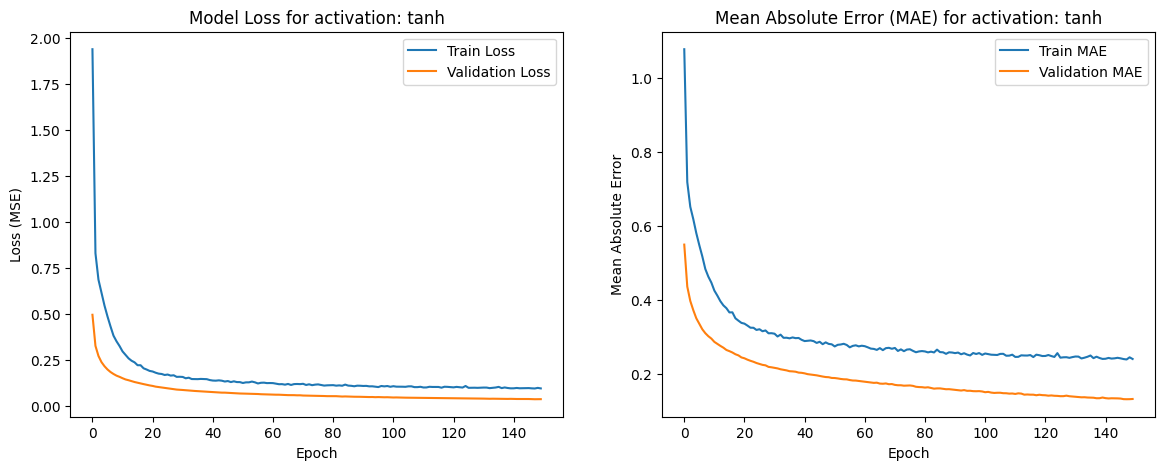

Training model with activation function: sigmoid
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.8511 - mean_absolute_error: 1.0462 - val_loss: 0.3978 - val_mean_absolute_error: 0.4800 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7715 - mean_absolute_error: 0.6870 - val_loss: 0.2925 - val_mean_absolute_error: 0.4084 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6639 - mean_absolute_error: 0.6348 - val_loss: 0.2674 - val_mean_absolute_error: 0.3900 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5718 - mean_absolute_error: 0.5936 - val_loss: 0.2561 - val_mean_absolute_error: 0.3799 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5111 - mean_absolute_error: 0.5577 - val_loss: 0.2487 - val_mean_absolute_error: 0.3739 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

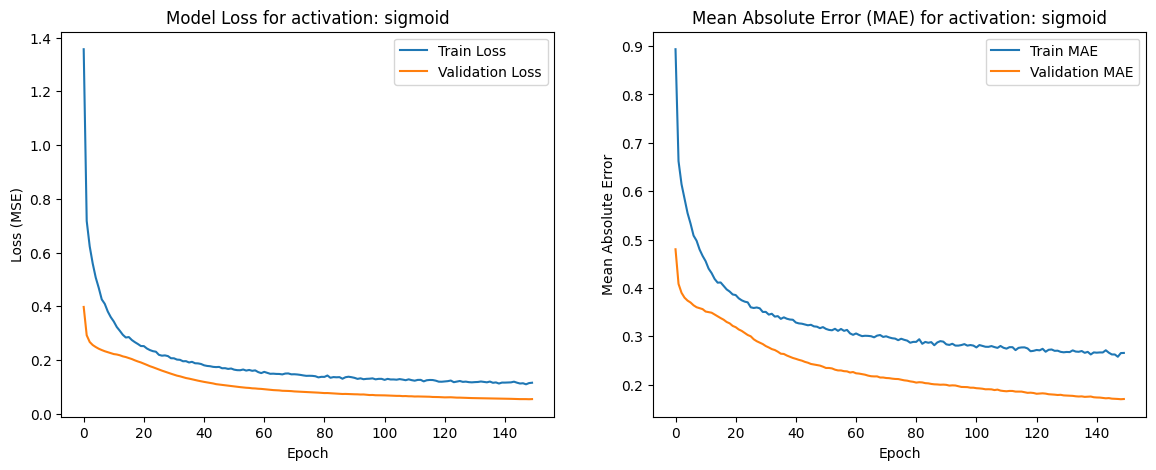

Training model with activation function: elu
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0400 - mean_absolute_error: 1.1002 - val_loss: 0.4484 - val_mean_absolute_error: 0.5142 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8765 - mean_absolute_error: 0.7285 - val_loss: 0.3329 - val_mean_absolute_error: 0.4393 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7343 - mean_absolute_error: 0.6655 - val_loss: 0.2892 - val_mean_absolute_error: 0.4073 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6507 - mean_absolute_error: 0.6305 - val_loss: 0.2648 - val_mean_absolute_error: 0.3887 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5716 - mean_absolute_error: 0.5893 - val_loss: 0.2460 - val_mean_absolute_error: 0.3725 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

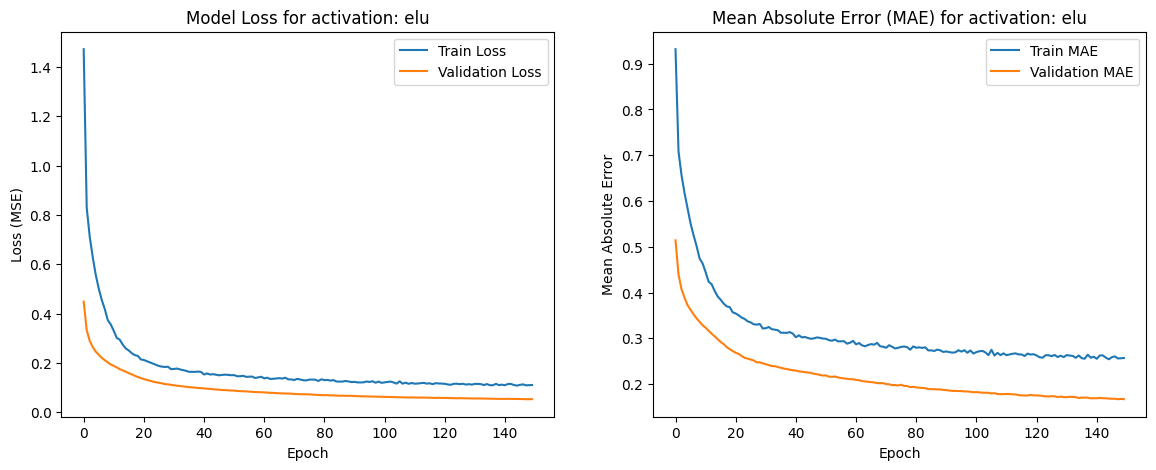

Training model with activation function: selu
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.2654 - mean_absolute_error: 1.1727 - val_loss: 0.4679 - val_mean_absolute_error: 0.5203 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8353 - mean_absolute_error: 0.7124 - val_loss: 0.3160 - val_mean_absolute_error: 0.4292 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6992 - mean_absolute_error: 0.6530 - val_loss: 0.2838 - val_mean_absolute_error: 0.4056 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6328 - mean_absolute_error: 0.6210 - val_loss: 0.2652 - val_mean_absolute_error: 0.3908 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5714 - mean_absolute_error: 0.5911 - val_loss: 0.2517 - val_mean_absolute_error: 0.3805 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

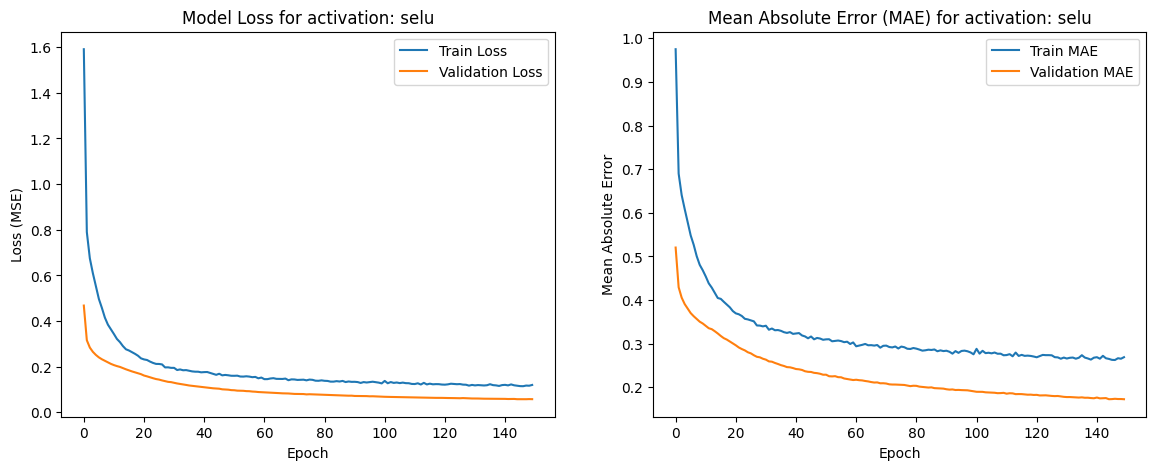

Training model with activation function: swish
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5348 - mean_absolute_error: 0.9600 - val_loss: 0.4576 - val_mean_absolute_error: 0.5197 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7870 - mean_absolute_error: 0.6898 - val_loss: 0.3194 - val_mean_absolute_error: 0.4334 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6443 - mean_absolute_error: 0.6270 - val_loss: 0.2591 - val_mean_absolute_error: 0.3905 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5525 - mean_absolute_error: 0.5774 - val_loss: 0.2230 - val_mean_absolute_error: 0.3603 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4690 - mean_absolute_error: 0.5321 - val_loss: 0.2001 - val_mean_absolute_error: 0.3407 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - los

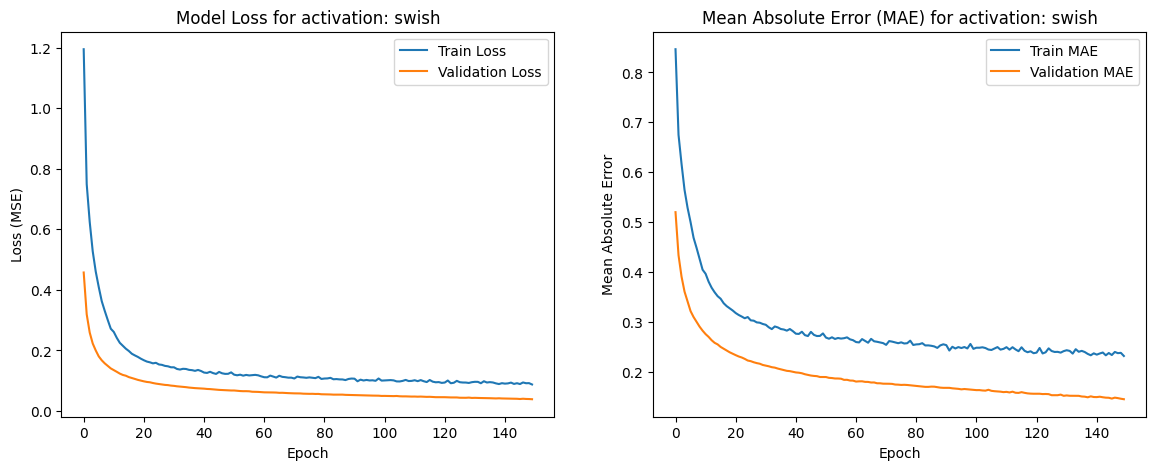

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data (assuming the final_combined_data_cleaned is already loaded)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season' (since it has an order) and use Year directly
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition' (since they have no order)
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['District', 'Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('District_') or col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Function to build a model with specified activation function and 64 neurons per layer
def build_model(activation, input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer for regression (no activation function)
    return model

# Experiment with different activation functions
activations = ['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'swish']

# Function to compile and train a model and return its history
def train_model(activation):
    model = build_model(activation, X_train.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    return history

# Plot results for each configuration
def plot_results(history, activation):
    plt.figure(figsize=(14, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for activation: {activation}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error (MAE) for activation: {activation}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.show()

# Loop over activation functions and train models
for activation in activations:
    print(f"Training model with activation function: {activation}")
    history = train_model(activation)
    plot_results(history, activation)


### Visualization of error for 2 neurons 

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.1487 - mean_absolute_error: 0.8415 - val_loss: 0.6572 - val_mean_absolute_error: 0.6118 - learning_rate: 0.0010
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7229 - mean_absolute_error: 0.6567 - val_loss: 0.5600 - val_mean_absolute_error: 0.5596 - learning_rate: 0.0010
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6303 - mean_absolute_error: 0.6091 - val_loss: 0.5060 - val_mean_absolute_error: 0.5335 - learning_rate: 0.0010
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5724 - mean_absolute_error: 0.5774 - val_loss: 0.4463 - val_mean_absolute_error: 0.4999 - learning_rate: 0.0010
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5368 - mean_absolute_error: 0.5652 - val_loss: 0.4204 - val_mean_absolute_error: 0.4884 - learning_rate: 0.0010
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5189 - mean_absolute_error: 0.5507 - val_loss: 0.4102 - val_mean_absolute_

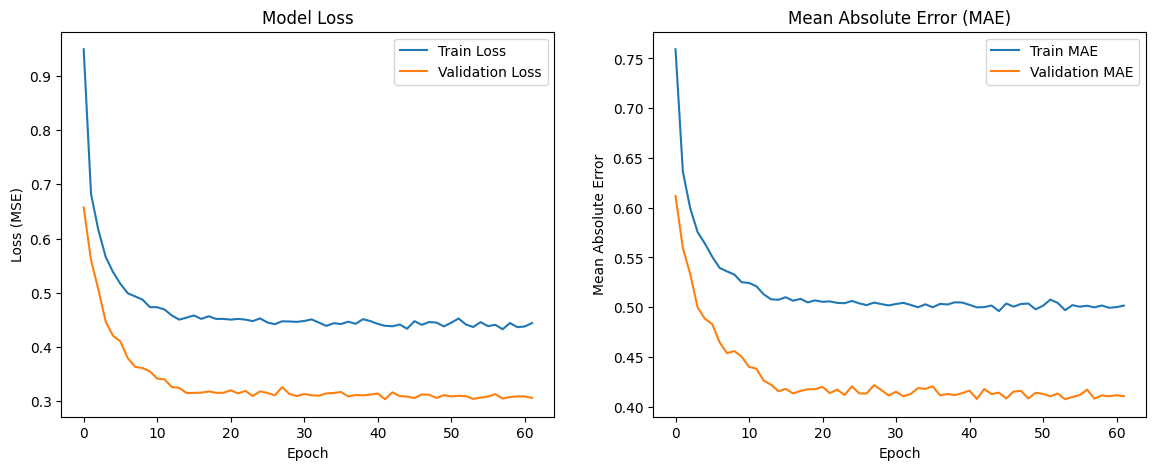

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data (assuming the final_combined_data_cleaned is already loaded)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season' (since it has an order) and use Year directly
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition' (since they have no order)
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition']) #  

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']

features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])


X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Normalize the features and target variable using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the Yield column
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(2, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()

525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 398.5455
Test RMSE: 405.3511
Train R^2: 0.7063
Test R^2: 0.6975
Train MAE: 294.7855
Test MAE: 300.0724
Train MAPE: 8.40%
Test MAPE: 8.55%


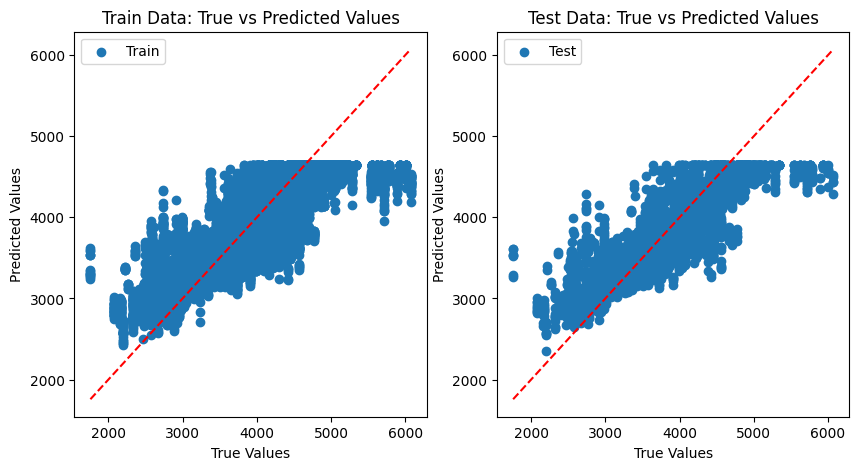

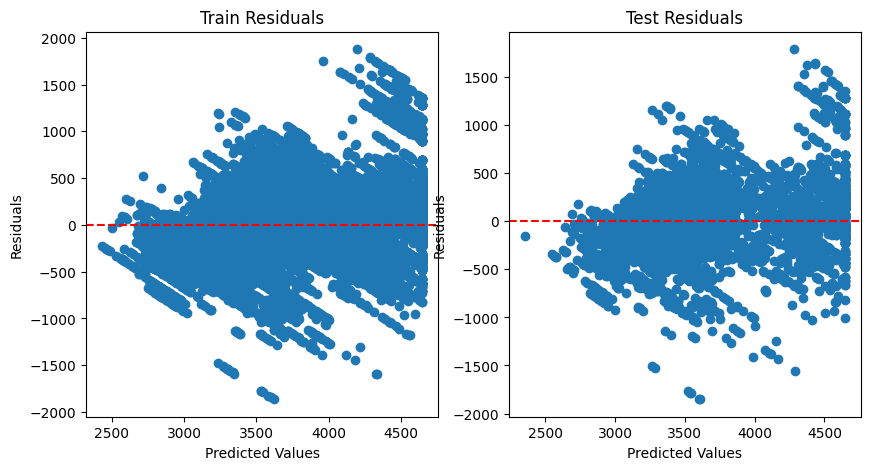

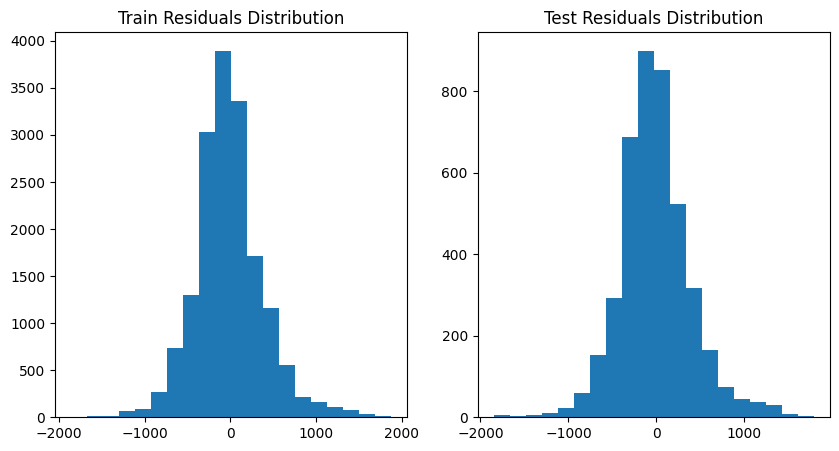

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)
y_train_rescaled = y_scaler.inverse_transform(y_train)
y_test_rescaled = y_scaler.inverse_transform(y_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

Layer: dense_12
Total Weights for dense_12: 62
Weights: (30, 2)
Weights:
[[-1.46461636e-01  2.58885086e-01]
 [ 1.65842548e-01 -1.05073992e-02]
 [-4.39134339e-04  7.08180889e-02]
 [-1.36943115e-02  6.89986395e-03]
 [ 3.78948473e-03 -2.40378492e-02]
 [ 9.23610758e-03  5.24845794e-02]
 [ 4.79264081e-01 -5.74872077e-01]
 [-7.85711482e-02  1.00044310e-01]
 [-3.30398679e-01 -4.14989926e-02]
 [ 7.21002836e-03  1.24357231e-01]
 [-7.23334774e-02  5.54978698e-02]
 [ 1.27981886e-01 -3.32042724e-02]
 [-2.42688432e-02  4.71040048e-02]
 [ 2.91397087e-02 -4.07161471e-03]
 [ 1.25582010e-01 -2.15924487e-01]
 [ 5.93864685e-03  4.75184917e-01]
 [-1.53412566e-01  3.55832055e-02]
 [ 1.00818053e-01 -5.43428302e-01]
 [-1.06890313e-01  1.22284122e-01]
 [ 3.36624347e-02 -2.40637660e-02]
 [ 6.26039878e-02  2.30768193e-02]
 [-3.78247917e-01 -3.09019178e-01]
 [ 2.35390171e-01  1.89240590e-01]
 [ 1.77775055e-01  1.67850569e-01]
 [-1.28836572e-01 -1.30705563e-02]
 [ 5.49642086e-01 -2.80342132e-01]
 [-2.17253566e-01

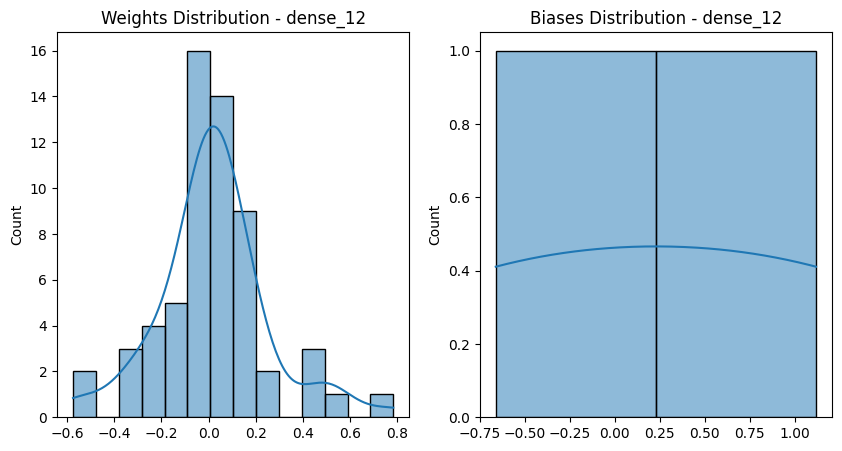

Layer: batch_normalization_6


<Figure size 1000x500 with 0 Axes>

Layer dropout_6 has no weights or biases.
Layer: dense_13
Total Weights for dense_13: 6
Weights: (2, 2)
Weights:
[[-1.1620774  -0.14663275]
 [ 0.3810727   0.10586609]]
Biases: (2,)
Biases:
[0.68414205 0.36571905]



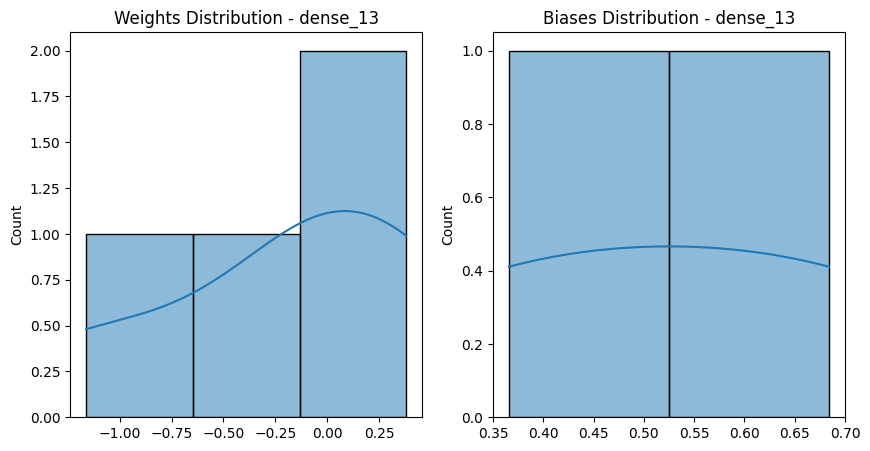

Layer: batch_normalization_7


<Figure size 1000x500 with 0 Axes>

Layer dropout_7 has no weights or biases.
Layer: dense_14
Total Weights for dense_14: 3
Weights: (2, 1)
Weights:
[[-0.3589921 ]
 [-0.44671023]]
Biases: (1,)
Biases:
[0.00493428]



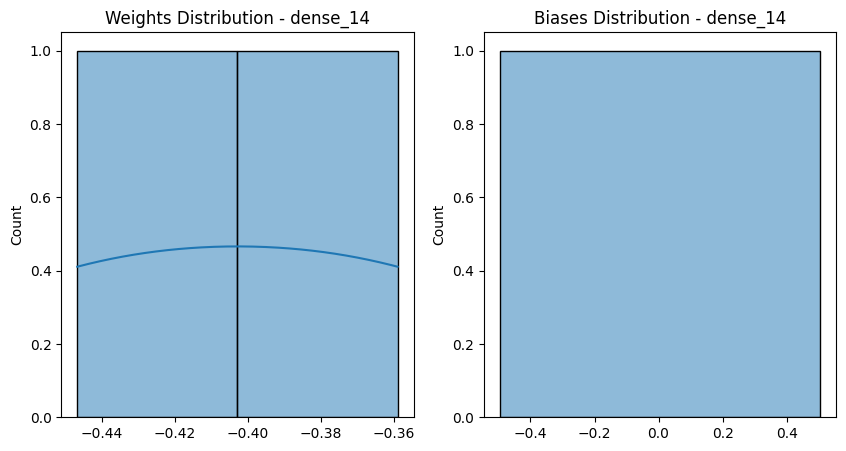


Total Count of Weights in the Model: 71


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize a variable to store the total count of weights across the entire model
total_weights_count = 0

for layer in model.layers:
    weights_biases = layer.get_weights()
    
    if len(weights_biases) > 0:  
        plt.figure(figsize=(10, 5))
        print(f"Layer: {layer.name}")
        
        if 'dense' in layer.name:  # Handling Dense layers (typical in MLP models)
            weights, biases = weights_biases        
            
            # Count total weights and biases
            layer_weights_count = np.prod(weights.shape) + np.prod(biases.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}")
            print(f"Biases: {biases.shape}")
            print(f"Biases:\n{biases}\n")
            
            # Plot weight distribution
            plt.subplot(1, 2, 1)
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
            
            # Plot bias distribution
            plt.subplot(1, 2, 2)
            sns.histplot(biases.flatten(), kde=True)
            plt.title(f'Biases Distribution - {layer.name}')
            
        elif len(weights_biases) == 1:  # If there's only one set of weights
            weights = weights_biases[0]
            
            # Count total weights
            layer_weights_count = np.prod(weights.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}\n")
            
            # Plot weight distribution
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
        
        plt.show()
    
    else:
        print(f"Layer {layer.name} has no weights or biases.")

# Print the total count of weights in the entire model
print(f"\nTotal Count of Weights in the Model: {total_weights_count}")

### For high layer count

d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2664 - mean_absolute_error: 0.8593 - val_loss: 0.2997 - val_mean_absolute_error: 0.4107 - learning_rate: 0.0010
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4819 - mean_absolute_error: 0.5349 - val_loss: 0.2298 - val_mean_absolute_error: 0.3603 - learning_rate: 0.0010
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3433 - mean_absolute_error: 0.4506 - val_loss: 0.2032 - val_mean_absolute_error: 0.3351 - learning_rate: 0.0010
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2980 - mean_absolute_error: 0.4152 - val_loss: 0.1887 - val_mean_absolute_error: 0.3219 - learning_rate: 0.0010
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2624 - mean_absolute_error: 0.3891 - val_loss: 0.1701 - val_mean_absolute_error: 0.3038 - learning_rate: 0.0010
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2440 - mean_absolute_error: 0.3762 - val_loss: 0.1574 - val_

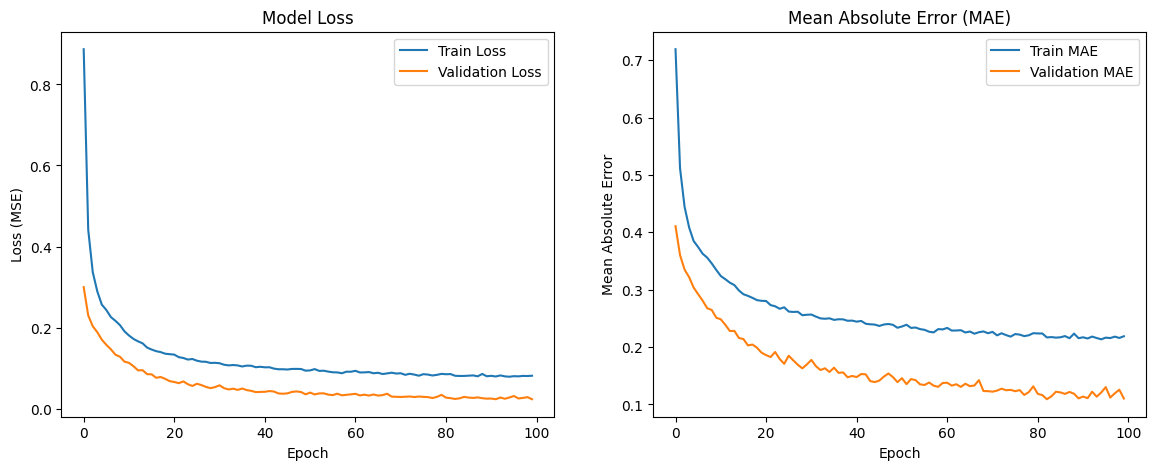

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data (assuming the final_combined_data_cleaned is already loaded)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')


# Label encode 'Season' (since it has an order) and use Year directly
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition' (since they have no order)
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition']) #  

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM',
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']

features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])


X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Normalize the features and target variable using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the Yield column
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()

525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train RMSE: 105.2262
Test RMSE: 112.0372
Train R^2: 0.9795
Test R^2: 0.9769
Train MAE: 75.2176
Test MAE: 81.1180
Train MAPE: 2.16%
Test MAPE: 2.34%


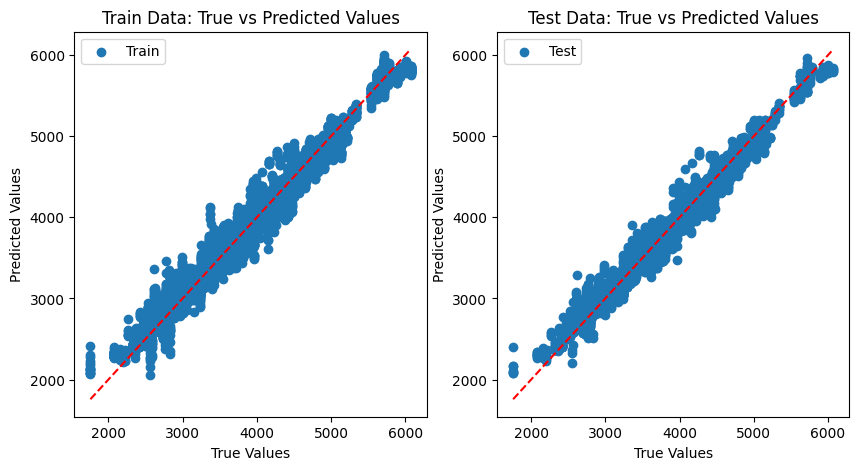

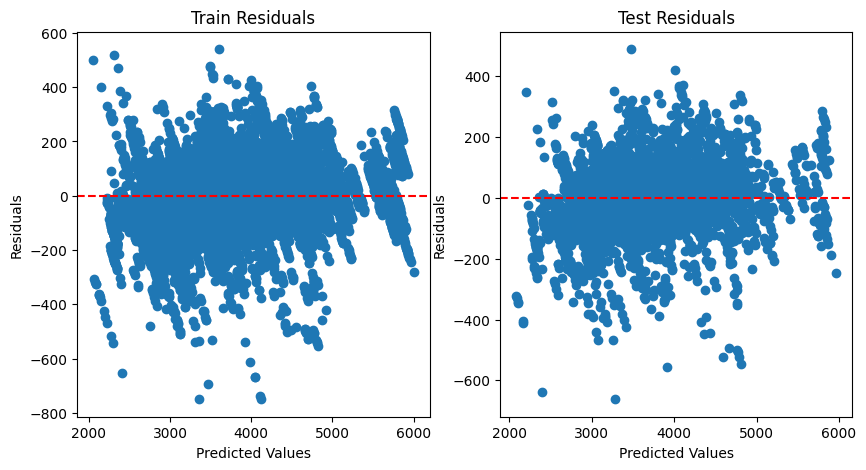

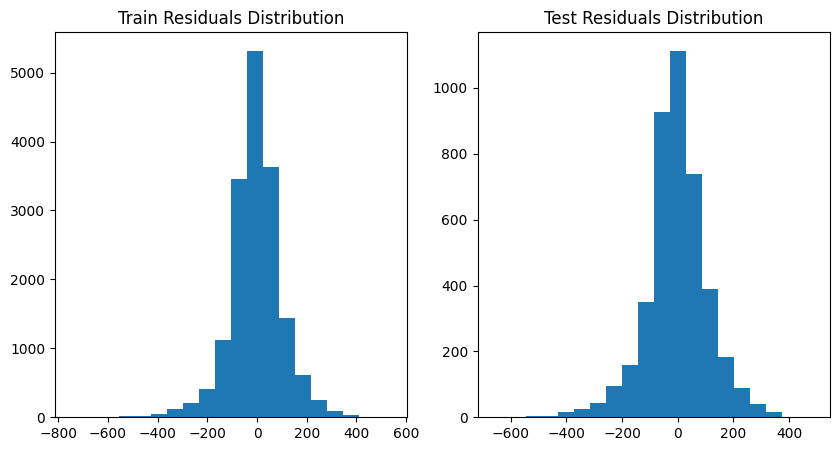

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)
y_train_rescaled = y_scaler.inverse_transform(y_train)
y_test_rescaled = y_scaler.inverse_transform(y_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

Layer: dense_15
Total Weights for dense_15: 1984
Weights: (30, 64)
Weights:
[[-2.6372420e-02  5.1997691e-02 -4.0949106e-02 ... -2.1141861e-02
   1.4215655e-02  2.3119541e-01]
 [-9.4812373e-03  3.6111321e-02 -4.2666726e-02 ... -1.9258946e-02
   7.1486406e-02 -8.3834641e-03]
 [ 9.5433453e-03 -2.8173781e-03 -1.2624636e-04 ... -1.0968863e-02
   2.6044248e-02  4.2447643e-04]
 ...
 [-1.2910223e-01 -1.0191505e-01 -1.9601154e-01 ...  2.0423084e-01
   1.0902414e-01 -2.0865344e-01]
 [-1.6955645e-01  5.7008184e-02  5.7989149e-03 ...  1.6247316e-01
   6.2502310e-02 -3.3458239e-01]
 [-2.0056109e-01 -1.3765903e-01 -1.0579904e-01 ...  1.2577486e-01
  -2.0821033e-01 -5.1389582e-02]]
Biases: (64,)
Biases:
[-0.25870663 -0.40412956 -0.12299645 -0.23198676 -0.35739523 -0.3645604
 -0.5342564   0.00248389 -0.41016603 -0.6922531  -0.35292166 -0.35622498
 -0.20770359  0.18994023 -0.334249   -0.30808508 -0.28195763 -0.29959634
 -0.38680196 -0.39854127 -0.54376525 -0.2807629  -0.01900063 -0.62710524
 -0.5800421

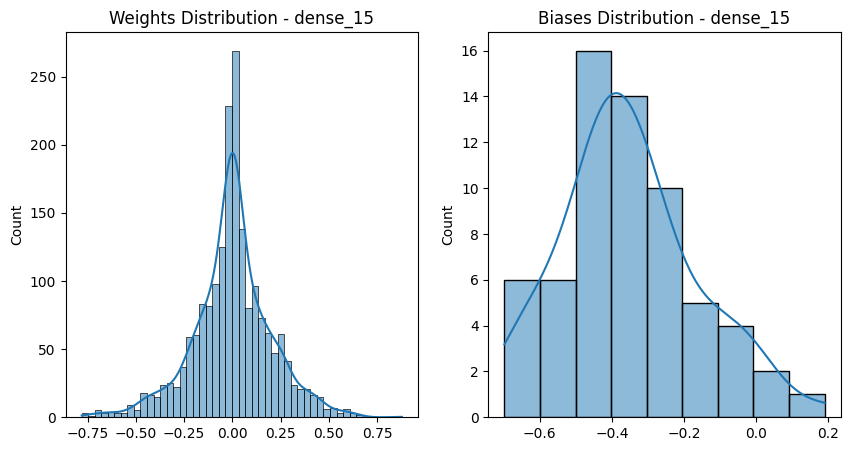

Layer: batch_normalization_8


<Figure size 1000x500 with 0 Axes>

Layer dropout_8 has no weights or biases.
Layer: dense_16
Total Weights for dense_16: 4160
Weights: (64, 64)
Weights:
[[ 0.18423711  0.07054705 -0.0765965  ... -0.07994895  0.15840366
   0.05817353]
 [-0.05807807 -0.11329754 -0.00301354 ...  0.06185907  0.04099296
   0.03574698]
 [-0.22688839  0.03039307  0.08230096 ... -0.07935733 -0.04360212
  -0.11828946]
 ...
 [ 0.21549337  0.02006482 -0.03888905 ... -0.0056372  -0.05483502
  -0.05689117]
 [-0.15022327  0.11827494  0.20185411 ...  0.05543484  0.02121632
  -0.24625684]
 [ 0.01169475  0.17824787 -0.107469   ...  0.08906417 -0.17216668
  -0.5418862 ]]
Biases: (64,)
Biases:
[-0.20022018  0.7200428   0.38025376  0.16370925  0.3501093   0.08225799
  0.724448   -0.39923337  0.5213994   0.5740349   0.33619088  0.71587074
  0.43203846  0.9504246  -0.5679566   0.86643577  0.8477817  -0.03553062
 -0.42869264 -0.35954162  0.03937807 -0.07017253 -0.02656217  0.3880374
 -0.07379464  0.6414162   0.870534    0.08203484  0.34749597  0.6269166
 -0.6

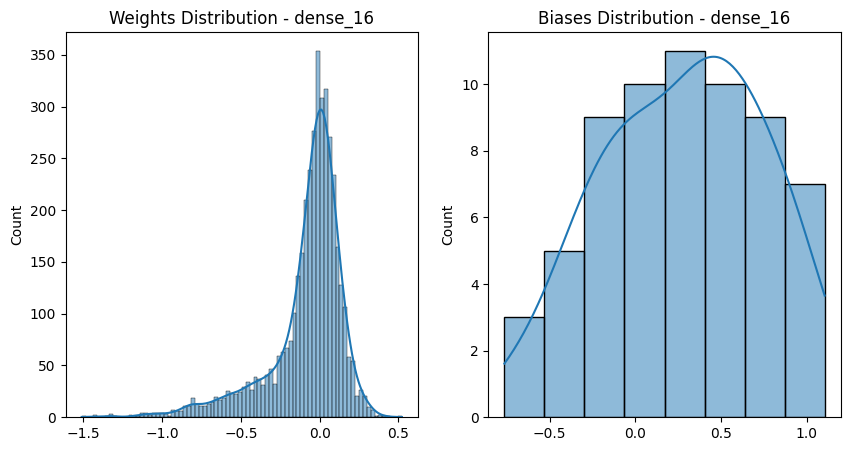

Layer: batch_normalization_9


<Figure size 1000x500 with 0 Axes>

Layer dropout_9 has no weights or biases.
Layer: dense_17
Total Weights for dense_17: 65
Weights: (64, 1)
Weights:
[[ 0.04492461]
 [-0.05236632]
 [-0.04742864]
 [-0.04127572]
 [-0.04884923]
 [ 0.04589302]
 [-0.0455215 ]
 [ 0.04275125]
 [ 0.03602114]
 [ 0.04401886]
 [ 0.04944278]
 [-0.03920171]
 [-0.0364939 ]
 [ 0.0563681 ]
 [ 0.04030583]
 [ 0.0486418 ]
 [-0.05615158]
 [ 0.03876931]
 [ 0.04601344]
 [-0.03569235]
 [ 0.04193602]
 [-0.03967831]
 [ 0.03354963]
 [ 0.03784778]
 [ 0.04626503]
 [-0.04888277]
 [ 0.04317655]
 [ 0.04717729]
 [ 0.04507946]
 [-0.04615135]
 [-0.04460849]
 [-0.04671258]
 [-0.03926709]
 [ 0.04482896]
 [-0.03465689]
 [ 0.04637511]
 [ 0.04717147]
 [ 0.05200056]
 [-0.04281646]
 [-0.04002719]
 [ 0.05225168]
 [ 0.04721351]
 [ 0.03761131]
 [-0.0368447 ]
 [-0.05171375]
 [ 0.03760737]
 [-0.04068903]
 [ 0.06035572]
 [ 0.04404917]
 [-0.04577332]
 [-0.06292523]
 [ 0.0402413 ]
 [ 0.04765702]
 [-0.04335778]
 [-0.05440852]
 [ 0.04778503]
 [ 0.0454874 ]
 [ 0.03860342]
 [ 0.04651107]


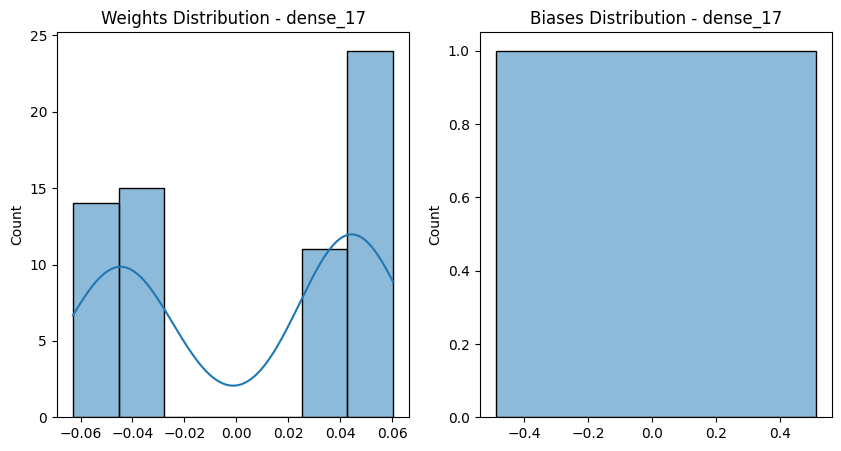


Total Count of Weights in the Model: 6209


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize a variable to store the total count of weights across the entire model
total_weights_count = 0

for layer in model.layers:
    weights_biases = layer.get_weights()
    
    if len(weights_biases) > 0:  
        plt.figure(figsize=(10, 5))
        print(f"Layer: {layer.name}")
        
        if 'dense' in layer.name:  # Handling Dense layers (typical in MLP models)
            weights, biases = weights_biases        
            
            # Count total weights and biases
            layer_weights_count = np.prod(weights.shape) + np.prod(biases.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}")
            print(f"Biases: {biases.shape}")
            print(f"Biases:\n{biases}\n")
            
            # Plot weight distribution
            plt.subplot(1, 2, 1)
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
            
            # Plot bias distribution
            plt.subplot(1, 2, 2)
            sns.histplot(biases.flatten(), kde=True)
            plt.title(f'Biases Distribution - {layer.name}')
            
        elif len(weights_biases) == 1:  # If there's only one set of weights
            weights = weights_biases[0]
            
            # Count total weights
            layer_weights_count = np.prod(weights.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}\n")
            
            # Plot weight distribution
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
        
        plt.show()
    
    else:
        print(f"Layer {layer.name} has no weights or biases.")

# Print the total count of weights in the entire model
print(f"\nTotal Count of Weights in the Model: {total_weights_count}")
